In [1]:
from sklearn.cluster import KMeans
import numpy as np
from Wind.Config import wind_data_path
import matplotlib.pyplot as plt
import seaborn as sn

In [19]:
data = np.load(wind_data_path+'10-5000-12.npy')
print(data.shape)
wind = data[:,0]
date = data[:,5]

wind=wind.reshape(-1,24)
date=date.reshape(-1,24)
date = date[:,0]


(61368, 6)


In [26]:
data = np.load(wind_data_path+'10-5007-12.npy')
print(data.shape)
wind2 = data[:,0]


wind2=wind2.reshape(-1,24)

(61368, 6)


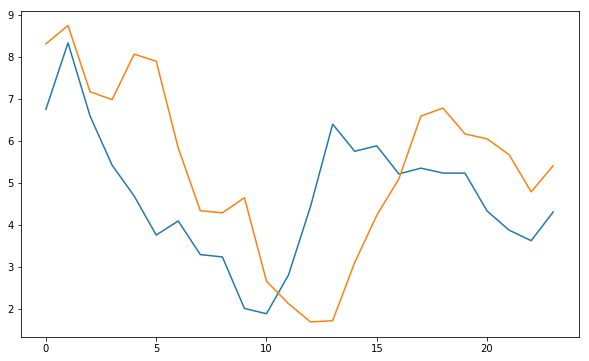

In [27]:

fig = plt.figure(figsize=(10,6))
plt.plot(wind[5,:])
plt.plot(wind2[5,:])

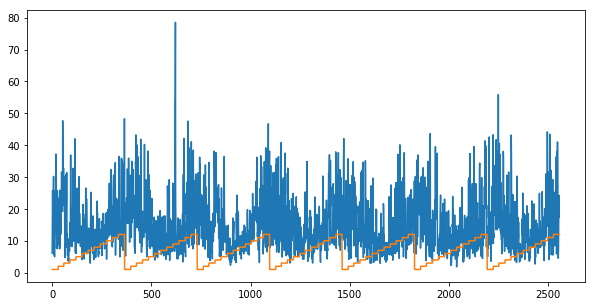

In [30]:

from scipy.spatial.distance import euclidean
dist = np.zeros(wind.shape[0]-1)

for i in range(dist.shape[0]):
    dist[i] = euclidean(wind2[i,:], wind2[i+1,:])
    

fig = plt.figure(figsize=(10,5))
plt.plot(dist);
plt.plot(date);

In [31]:
from pyentrp import entropy

print(entropy.shannon_entropy(dist))

11.319672120947233


In [ ]:
nc = 20
kmeans = KMeans(n_clusters=nc)
labels = kmeans.fit_predict(wind)


In [ ]:
nf =5 
fig = plt.figure(figsize=(18,18))
for i in range(nc):
    ax = fig.add_subplot(nf, nc//nf, i + 1)
    for p, j in enumerate(labels):
        if j == i:
            ax.plot(wind[p])
            ax.set_ylim([0,np.max(wind)])
plt.show();

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score, calinski_harabaz_score, davies_bouldin_score 
import warnings
warnings.filterwarnings("ignore")

lscores = []
nclusters = 100
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(wind)
    lscores.append(
        davies_bouldin_score(wind, labels))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(range(2,nclusters+1), lscores);
       
        

In [ ]:
%matplotlib notebook
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from mpl_toolkits.mplot3d import Axes3D

pca = PCA()
pca = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
pca= TSNE(n_components=3)
pdata = pca.fit_transform(wind)

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax.scatter(pdata[:, 0], pdata[:, 1], c=date, cmap=plt.get_cmap("Blues"));

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pdata[:, 0], pdata[:, 1], pdata[:, 2], depthshade=False, c=date, cmap=plt.get_cmap("Blues"));


In [ ]:
import umap
u = umap.UMAP(n_neighbors=5,
                     min_dist=0.3,
                     metric='euclidean').fit_transform(wind)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter(u[:,0], u[:,1], c=date, cmap=plt.get_cmap("Blues"));

